In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *

import math
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.io import savemat
from scipy import interpolate
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy.matlib
from scipy.special import expit

import time
import os
plt.rcParams['figure.figsize'] = [6, 4] 

# Pictures Describing Copulas

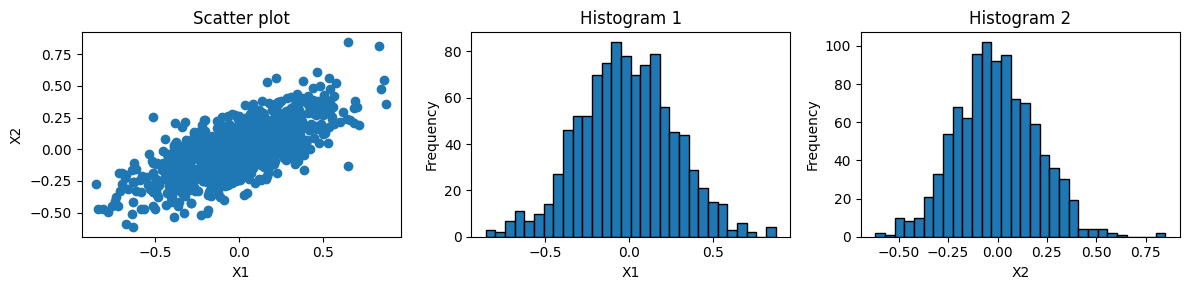

In [304]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

ax1.plot(X[:,0],X[:,1], 'o')
ax1.set_title('Scatter plot')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')


# Plot the first histogram
ax2.hist(X[:,0], bins=30, edgecolor='black')
ax2.set_title('Histogram 1')
ax2.set_xlabel('X1')
ax2.set_ylabel('Frequency')

# Plot the second histogram
ax3.hist(X[:,1], bins=30, edgecolor='black')
ax3.set_title('Histogram 2')
ax3.set_xlabel('X2')
ax3.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

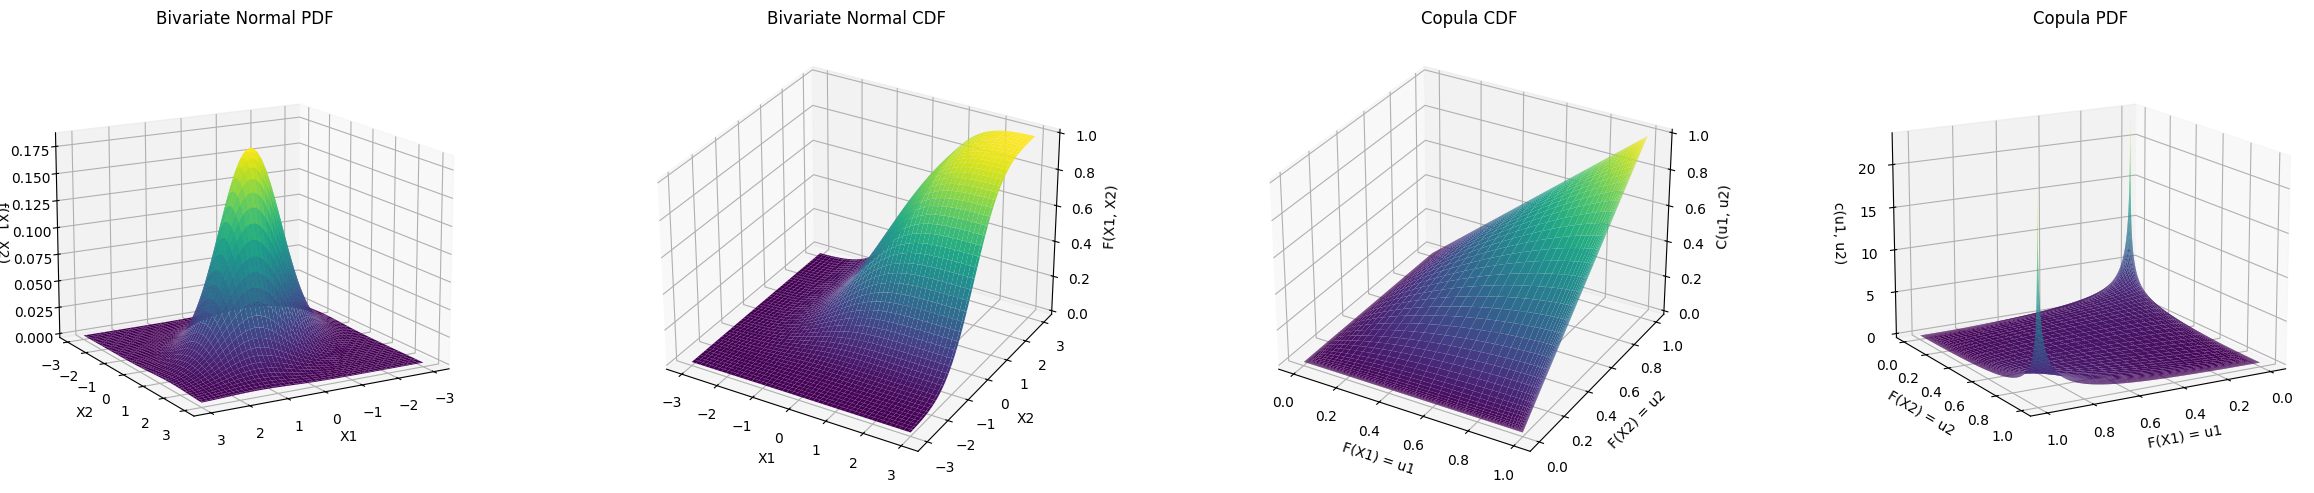

In [352]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

# Create a grid of (x, y) points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))

# Create the bivariate normal distribution for PDF
rv_pdf = multivariate_normal(mean, cov)
z_pdf = rv_pdf.pdf(pos)

# Create the bivariate normal distribution for CDF
rv_cdf = multivariate_normal(mean, cov)
z_cdf = rv_cdf.cdf(pos)

# Create the figure and subplots
fig = plt.figure(figsize=(25, 5))

# Plot the PDF surface
ax1 = fig.add_subplot(141, projection='3d')
ax1.plot_surface(x, y, z_pdf, cmap='viridis')
ax1.set_title('Bivariate Normal PDF')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('f(X1, X2)')
ax1.view_init(elev=15, azim=60, roll=0)

# Plot the CDF surface
ax2 = fig.add_subplot(142, projection='3d')
ax2.plot_surface(x, y, z_cdf, cmap='viridis')
ax2.set_title('Bivariate Normal CDF')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('F(X1, X2)')

# Plot of the copula function
# create a grid of (u_x, u_y) points ie the unit square
u_x = norm.cdf(x)
u_y = norm.cdf(y)

ax3 = fig.add_subplot(143, projection='3d')
ax3.plot_surface(u_x, u_y, z_cdf, cmap='viridis')
ax3.set_title('Copula CDF')
ax3.set_xlabel('F(X1) = u1')
ax3.set_ylabel('F(X2) = u2')
ax3.set_zlabel('C(u1, u2)')


# Copula PDF function
c_pdf = z_pdf / (norm.pdf(x) * norm.pdf(y))

ax4 = fig.add_subplot(144, projection='3d')
ax4.plot_surface(u_x, u_y, c_pdf, cmap= 'viridis')
ax4.set_title('Copula PDF')
ax4.set_xlabel('F(X1) = u1')
ax4.set_ylabel('F(X2) = u2')
ax4.set_zlabel('c(u1, u2)')
ax4.view_init(elev=15, azim=60, roll=0)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In figure above the x1,x2 space is transformed to a u1,u2 space. In this space the height of the CDF is the same for the copula and Normal CDF. The copula is however on the [0,1] domain. The two middle plots have the same height for corresponding points. However since the copula uses the transformed values through each marginal $F_i(x_i)$. This is a nonlinear transformation so it does not look like they are the same.  

Sklars theorem states that given any joint distribution $F(x_1,x_2)$ there is a unique copula function such that $F(x_1,x_2) = C(F_1(x_1), F_2(x_2))$. Here $F_i(x_i) = u_i$

differentiating both sides gives that $ f(x_1,x_2) = f_1(x_1)f_2(x_2)c(F_1(x_1), F_2(x_2))$. 

Hence the copula pdf can be written as $ c(F_1(x_1), F_2(x_2)) = \frac{\partial^2C(F_1(x_1),F_2(x_2))}{\partial F_1(x_1)\partial F_2(x_2)} =\frac{f(x_1,x_2)}{(f_1(x_1)f_2(x_2))}$?


# Frechet bounds

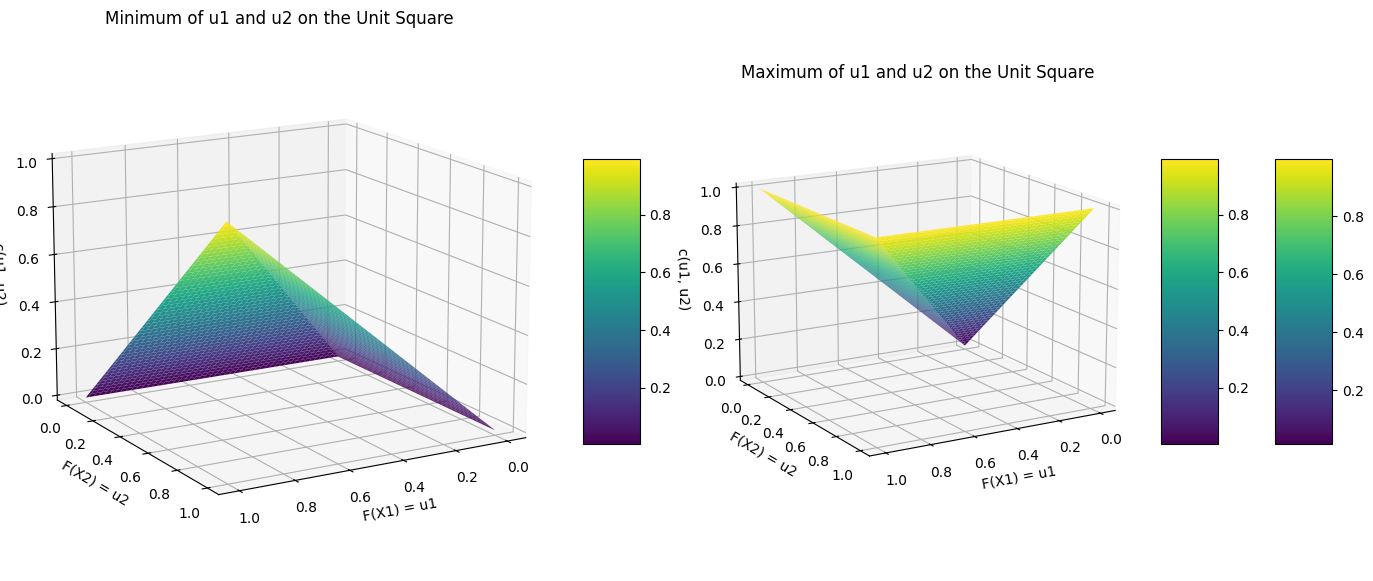

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the unit square
u1 = np.linspace(0, 1, 100)
u2 = np.linspace(0, 1, 100)

# Create a meshgrid
U1, U2 = np.meshgrid(u1, u2)

# Calculate the maximum and minimum of the two numbers at each point in the grid
Zmax = np.maximum(U1, U2)
Zmin = np.minimum(U1, U2)

# Create a figure and subplots
fig = plt.figure(figsize=(14, 6))

# First subplot for the minimum
ax3 = fig.add_subplot(121, projection='3d')
surf_min = ax3.plot_surface(U1, U2, Zmin, cmap='viridis')
fig.colorbar(surf_min, ax=ax3, shrink=0.5, aspect=5)
ax3.set_title('Minimum of u1 and u2 on the Unit Square')
ax3.set_xlabel('F(X1) = u1')
ax3.set_ylabel('F(X2) = u2')
ax3.set_zlabel('c(u1, u2)')

# Second subplot for the maximum
ax4 = fig.add_subplot(122, projection='3d')
surf_max = ax4.plot_surface(U1, U2, Zmax, cmap='viridis')
fig.colorbar(surf_max, ax=ax4, shrink=0.5, aspect=5)
ax4.set_title('Maximum of u1 and u2 on the Unit Square')
ax4.set_xlabel('F(X1) = u1')
ax4.set_ylabel('F(X2) = u2')
ax4.set_zlabel('c(u1, u2)')

# Set the view angle for both plots
ax3.view_init(elev=15, azim=60, roll=0)
ax4.view_init(elev=15, azim=60, roll=0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




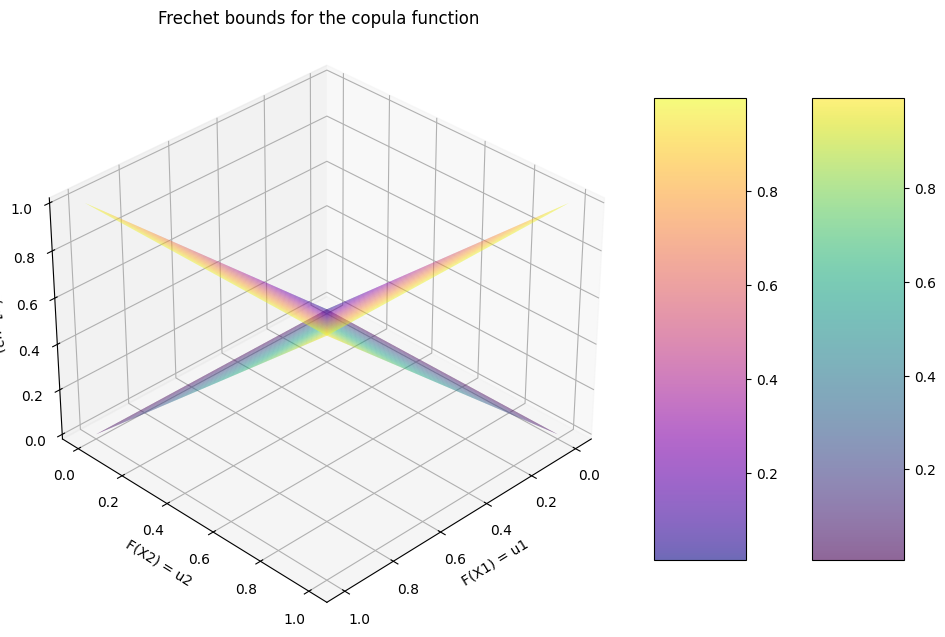

In [370]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the unit square
u1 = np.linspace(0, 1, 100)
u2 = np.linspace(0, 1, 100)

# Create a meshgrid
U1, U2 = np.meshgrid(u1, u2)

# Calculate the maximum and minimum of the two numbers at each point in the grid
Zmax = np.maximum(U1, U2)
Zmin = np.minimum(U1, U2)

# Create a figure and a 3D plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface for minimum
surf_min = ax.plot_surface(U1, U2, Zmin, cmap='viridis', alpha=0.6)

# Plot the surface for maximum
surf_max = ax.plot_surface(U1, U2, Zmax, cmap='plasma', alpha=0.6)

# Add color bars which map values to colors
fig.colorbar(surf_min, ax=ax, shrink=0.5, aspect=5)
fig.colorbar(surf_max, ax=ax, shrink=0.5, aspect=5)

# Set titles and labels
ax.set_title('Frechet bounds for the copula function')
ax.set_xlabel('F(X1) = u1')
ax.set_ylabel('F(X2) = u2')
ax.set_zlabel('c(u1, u2)')

# Set the view angle
ax.view_init(elev=33, azim=45, roll=0)

# Show the plot
plt.show()


# Simulating processes

## 1) Uncorrelated Gaussian

System: 

$dS_t^1 = \mu_1 S_t^1 dt + \sigma_1 S_t^1 dW_t^1,  S_0^1 = s_0^1$   

$dS_t^2 = \mu_2 S_t^2 dt+ \sigma_2 S_t^2 dW_t^2,  S_0^2 = s_0^2$ 

$W_t^1  \perp\!\!\!\perp W_t^2$

<!-- Solution:

$S_t^1 = S_0^1 \mathrm{exp}\{(r-\frac{\sigma_1^2}{2})t + \sigma_1 W_t^1\} $

$S_t^2 = S_0^2 \mathrm{exp}\{(r-\frac{\sigma_2^2}{2})t + \sigma_2 W_t^2\} $ -->


Euler-Maruyama discretization: (For one stock)

- Initialize:
    Solve the SDE
    Set $Y_0^i = S_0^i$

- Iterate over time partitions:
    $Y_{n+1}^i = Y_n^i +\alpha Y_n^i \Delta t + \beta Y_n^i \Delta W_n^i, $ where  $\alpha = \mu S_t^i, \beta = \sigma_i S_t^i $ 
    


<!-- 
$S_{t_{i+1}}^1 = S_{t_{i}}^1 \mathrm{exp}\{(r-\frac{\sigma_1^2}{2})(t_{i+1}-t_{i}) + \sigma_1 (W_{t_{i+1}}^1 - W_{t_{i}}^1) \} $
$\Rightarrow  S_{t_{i+1}}^1 = S_{t_{i}}^1 \mathrm{exp}\{(r-\frac{\sigma_1^2}{2})(t_{i+1}-t_{i}) + \sqrt{t_{i+1}-t_{i}} \sigma_1 Z_{i+1}^1  \}$ 



$S_{t_{i+1}}^2 = S_{t_{i}}^2 \mathrm{exp}\{(r-\frac{\sigma_2^2}{2})(t_{i+1}-t_{i}) + \sigma_2 (W_{t_{i+1}}^2 - W_{t_{i}}^2) \} $
$\Rightarrow  S_{t_{i+1}}^2 = S_{t_{i}}^2 \mathrm{exp}\{(r-\frac{\sigma_2^2}{2})(t_{i+1}-t_{i}) + \sqrt{t_{i+1}-t_{i}} \sigma_2 Z_{i+1}^2  \}$ 
 -->



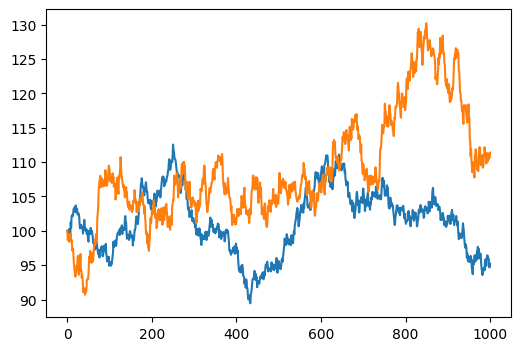

In [184]:
s_0 = np.array([100, 100]); mu = np.array([0.03, 0.03]); sigma = np.array([0.2, 0.3])
Timesteps = 1000; T = 1; dt = T/Timesteps   
stocks = s_0.shape[0]


def eulerMaruyama(s_0, Z, mu, sigma, dt):
    stocks = s_0.shape[0]
    timeSteps = Z.shape[0]
    S = s_0 * np.ones((timeSteps+1, stocks))
    
    for t in range(1, timeSteps+1):

        S[t, :] =  (S[t-1, :] + S[t-1, :]* mu * dt + S[t-1, :]*sigma * np.sqrt(dt) * Z[t-1, :])
    return S

Z = np.random.standard_normal((Timesteps, stocks))
S = eulerMaruyama(s_0, Z, mu, sigma, dt)
plt.plot(S) 



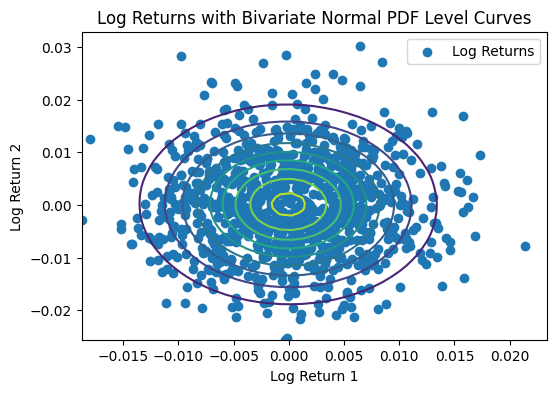

mean: [-4.90625785e-05  1.07781582e-04]
correlation: -0.009199249048825813


In [185]:
def logReturns(S):
    logReturns = np.log(S[1:,:] / S[:-1,:])
    return logReturns

# Assuming S is already defined and contains the simulated stock prices
logR = logReturns(S)

# Estimate mean vector and covariance matrix
mean_vector = np.mean(logR, axis=0)
cov_matrix = np.cov(logR, rowvar=False)
corr_matrix = np.corrcoef(logR, rowvar=False)
# Create a grid of points
x, y = np.mgrid[logR[:,0].min():logR[:,0].max():.001, logR[:,1].min():logR[:,1].max():.001]
pos = np.dstack((x, y))

# Create a multivariate normal distribution based on the estimated mean and covariance
rv = multivariate_normal(mean_vector, cov_matrix)

# Plot the scatter plot of log returns
plt.scatter(logR[:,0], logR[:,1], label='Log Returns')

# Plot the level curves of the bivariate normal pdf
plt.contour(x, y, rv.pdf(pos), levels=10, cmap='viridis')

plt.xlabel('Log Return 1')
plt.ylabel('Log Return 2')
plt.title('Log Returns with Bivariate Normal PDF Level Curves')
plt.legend()
plt.show()


print('mean:', mean_vector)
print('correlation:', corr_matrix[0,1])

## 2) Correlated Gaussian


System: 

$dS_t^1 = \mu_1 S_t^1 dt + \sigma_1 S_t^1 dW_t^1,  S_0^1 = s_0^1$   

$dS_t^2 = \mu_2 S_t^2 dt+ \sigma_2 S_t^2 dW_t^2,  S_0^2 = s_0^2$ 

$ \langle  W_t^1,  W_t^2 \rangle = \delta t$



Euler-Maruyama discretization: (For one stock)

- Initialize:
    Solve the SDE
    Set $Y_0^i = S_0^i$

- Iterate over time partitions:
    $Y_{n+1}^i = Y_n^i +\alpha Y_n^i \Delta t + \beta Y_n^i \Delta W_n^i, $ where  $\alpha = \mu S_t^i, \beta = \sigma_i S_t^i $ 


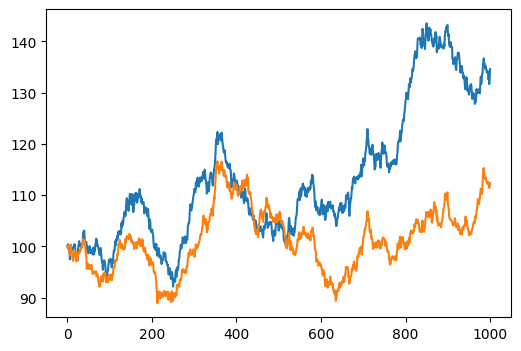

In [ ]:
s_0 = np.array([100, 100]); mu = np.array([0.03, 0.03]); sigma = np.array([0.2, 0.3])
Timesteps = 1000; T = 1; dt = T/Timesteps   
stocks = s_0.shape[0]; rho = 0.7

## Create correlation matrix
corrMat = np.array([[1, 0.7], [0.7, 1]])
A = np.linalg.cholesky(corrMat)
Z = np.random.standard_normal((Timesteps, stocks)) 
X = Z @ A

S = eulerMaruyama(s_0, X, mu, sigma, dt)
plt.plot(S) 

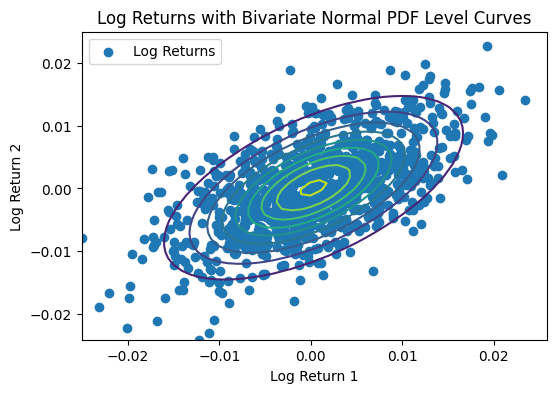

mean: [0.000297   0.00011623]
correlation: 0.5957579866577527


In [ ]:
# Calculate log returns
logR = logReturns(S)

# Estimate mean vector and covariance matrix
mean_vector = np.mean(logR, axis=0)
cov_matrix = np.cov(logR, rowvar=False)
corr_matrix = np.corrcoef(logR, rowvar=False)
# Create a grid of points
x, y = np.mgrid[logR[:,0].min():logR[:,0].max():.001, logR[:,1].min():logR[:,1].max():.001]
pos = np.dstack((x, y))

# Create a multivariate normal distribution based on the estimated mean and covariance
rv = multivariate_normal(mean_vector, cov_matrix)

# Plot the scatter plot of log returns
plt.scatter(logR[:,0], logR[:,1], label='Log Returns')

# Plot the level curves of the bivariate normal pdf
plt.contour(x, y, rv.pdf(pos), levels=10, cmap='viridis')

plt.xlabel('Log Return 1')
plt.ylabel('Log Return 2')
plt.title('Log Returns with Bivariate Normal PDF Level Curves')
plt.legend()
plt.show()

print('mean:', mean_vector)
print('correlation:', corr_matrix[0,1])

## 3) Mixed drift terms but uncorrelated brownian motions

System: 

$dS_t^1 = \mu^1 S_t^1 dt + \sigma^1 S_t^1 dW_t^1,  S_0^1 = s_0^1$ 
    
$dS_t^2 = \mu^2 S_t^1 dt+ \sigma^2 S_t^2 dW_t^2,  S_0^2 = s_0^2$ 

$W_t^1  \perp\!\!\!\perp W_t^2$




Solution:



Euler-Maruyama discretization:



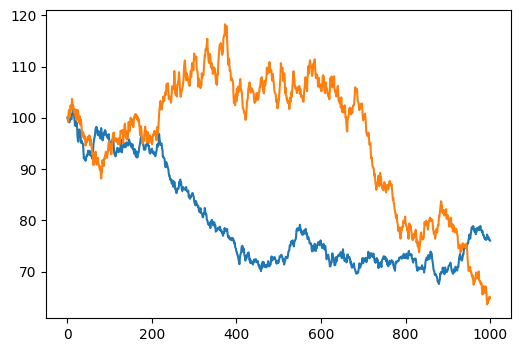

In [179]:
def eulerMaruyamaMixedDrift(s_0, Z, mu, sigma, dt):
    stocks = s_0.shape[0]
    timeSteps = Z.shape[0]
    S = s_0 * np.ones((timeSteps+1, stocks))
    
    for t in range(1, timeSteps+1):

        S[t, 0] =  (S[t-1, 0] + S[t-1, 0]* mu[0] * dt + S[t-1, 0]*sigma[0] * np.sqrt(dt) * Z[t-1, 0])
        S[t, 1] =  (S[t-1, 1] + S[t-1, 0]* mu[1] * dt + S[t-1, 1]*sigma[1] * np.sqrt(dt) * Z[t-1, 1])
    return S

s_0 = np.array([100, 100]); mu = np.array([0.03, 0.03]); sigma = np.array([0.2, 0.3])
Timesteps = 1000; T = 1; dt = T/Timesteps   
stocks = s_0.shape[0]  #; rho = 0.7
Z = np.random.standard_normal((Timesteps, stocks)) 

S = eulerMaruyamaMixedDrift(s_0, Z, mu, sigma, dt)
plt.plot(S) 


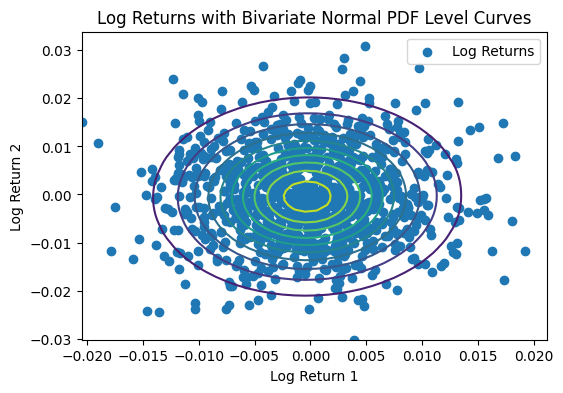

mean: [-0.0002742  -0.00043416]
correlation: 0.01046868804460398


In [180]:
# Calculate log returns
logR = logReturns(S)

# Estimate mean vector and covariance matrix
mean_vector = np.mean(logR, axis=0)
cov_matrix = np.cov(logR, rowvar=False)
corr_matrix = np.corrcoef(logR, rowvar=False)
# Create a grid of points
x, y = np.mgrid[logR[:,0].min():logR[:,0].max():.001, logR[:,1].min():logR[:,1].max():.001]
pos = np.dstack((x, y))

# Create a multivariate normal distribution based on the estimated mean and covariance
rv = multivariate_normal(mean_vector, cov_matrix)

# Plot the scatter plot of log returns
plt.scatter(logR[:,0], logR[:,1], label='Log Returns')

# Plot the level curves of the bivariate normal pdf
plt.contour(x, y, rv.pdf(pos), levels=10, cmap='viridis')

plt.xlabel('Log Return 1')
plt.ylabel('Log Return 2')
plt.title('Log Returns with Bivariate Normal PDF Level Curves')
plt.legend()
plt.show()


print('mean:', mean_vector)
print('correlation:', corr_matrix[0,1])

## 4) Mixed drift terms and correlated brownian motions

System: 

$dS_t^1 = \mu^1 S_t^1 dt + \sigma^1 S_t^1 dW_t^1,  S_0^1 = s_0^1$ 
    
$dS_t^2 = \mu^2 S_t^1 dt+ \sigma^2 S_t^2 dW_t^2,  S_0^2 = s_0^2$ 

$ \langle  W_t^1,  W_t^2 \rangle = \delta t$





Solution:



Euler-Maruyama discretization:



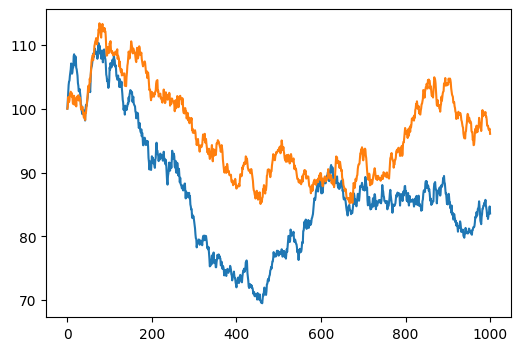

In [193]:
s_0 = np.array([100, 100]); mu = np.array([0.03, 0.03]); sigma = np.array([0.2, 0.3])
Timesteps = 1000; T = 1; dt = T/Timesteps   
stocks = s_0.shape[0]  #; rho = 0.7

## Create correlation matrix
corrMat = np.array([[1, 0.7], [0.7, 1]])
A = np.linalg.cholesky(corrMat)
np.random.seed(0)
Z = np.random.standard_normal((Timesteps, stocks)) 
X = Z @ A

S = eulerMaruyamaMixedDrift(s_0, X, mu, sigma, dt)
plt.plot(S) 

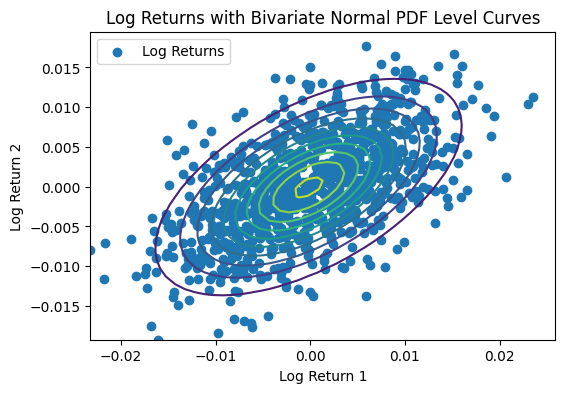

mean: [-1.79399532e-04 -4.02145333e-05]
correlation: 0.5681445840559143


In [194]:
# Calculate log returns
logR = logReturns(S)

# Estimate mean vector and covariance matrix
mean_vector = np.mean(logR, axis=0)
cov_matrix = np.cov(logR, rowvar=False)
corr_matrix = np.corrcoef(logR, rowvar=False)
# Create a grid of points
x, y = np.mgrid[logR[:,0].min():logR[:,0].max():.001, logR[:,1].min():logR[:,1].max():.001]
pos = np.dstack((x, y))

# Create a multivariate normal distribution based on the estimated mean and covariance
rv = multivariate_normal(mean_vector, cov_matrix)

# Plot the scatter plot of log returns
plt.scatter(logR[:,0], logR[:,1], label='Log Returns')

# Plot the level curves of the bivariate normal pdf
plt.contour(x, y, rv.pdf(pos), levels=10, cmap='viridis')

plt.xlabel('Log Return 1')
plt.ylabel('Log Return 2')
plt.title('Log Returns with Bivariate Normal PDF Level Curves')
plt.legend()
plt.show()


print('mean:', mean_vector)
print('correlation:', corr_matrix[0,1])